## (1) 데이터 가져오기

- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [116]:
from sklearn.datasets import load_diabetes

diabetes_data = load_diabetes()
df_X = diabetes_data.data
df_y = diabetes_data.target

## (2) 모델에 입력할 데이터 X 준비하기

- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [117]:
# 이미 numpy array
type(df_X)

numpy.ndarray

## (3) 모델에 예측할 데이터 y 준비하기

- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [118]:
# 이미 numpy array
type(df_y)

numpy.ndarray

## (4) train 데이터와 test 데이터로 분리하기

- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309,), (133,))

## (5) 모델 준비하기

- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [120]:
import numpy as np

W = np.random.rand(10)
b = np.random.rand(1)

print(f"{W=}\n{b=}")

W=array([0.71785512, 0.79939532, 0.18365124, 0.41609178, 0.28914424,
       0.13762299, 0.63127672, 0.0913284 , 0.02593378, 0.65007525])
b=array([0.09988688])


## (6) 손실함수 loss 정의하기

- 손실함수를 MSE 함수로 정의해주세요.

In [121]:
df_y.shape[0]

442

In [122]:
def MSE(y, y_pred):
    return np.sum((y - y_pred) ** 2) / y.shape[0]

In [123]:
y = np.array([1., 2., 3.])
y_pred = np.array([2., 3., 4.])

MSE(y, y_pred) # for testing

1.0

## (7) 기울기를 구하는 gradient 함수 구현하기

- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [124]:
df_X.shape, W.shape, b.shape

((442, 10), (10,), (1,))

In [125]:
def model(X, W, b):
    return X@W + b

def gradient(X, W, b, y):
    N = X.shape[0]
    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T@(y_pred-y)
    db = (2 * (y_pred - y)).mean()
    return dW, db

In [126]:
gradient(X_train, W, b, y_train)

(array([-1.3039772 , -1.19020698, -3.89218894, -3.10260195, -1.78621966,
        -1.50195341,  3.13233773, -3.35304374, -4.33250966, -2.74102356]),
 -300.22888227283926)

## (8) 하이퍼 파라미터인 학습률 설정하기

- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.


In [127]:
LEARNING_RATE = 0.5

## (9) 모델 학습하기

- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [128]:
EPOCHS = 2_000
losses = []

for epoch in range(EPOCHS):
    # measure loss
    y_pred = model(X_train, W, b)
    loss = MSE(y_train, y_pred)
    losses.append(loss)

    # update params
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE*dW
    b -= LEARNING_RATE*db

Text(0, 0.5, 'loss')

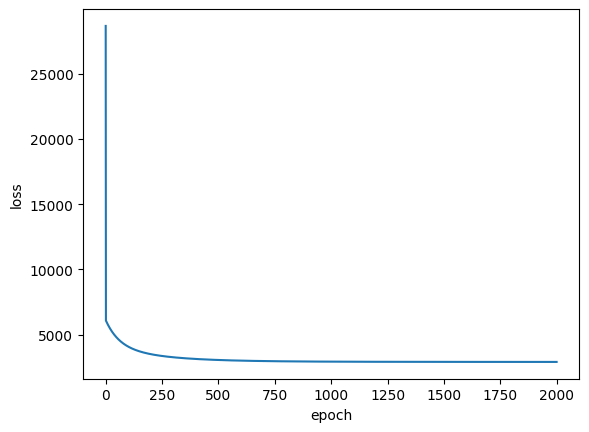

In [129]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")

## (10) test 데이터에 대한 성능 확인하기

- test 데이터에 대한 성능을 확인해주세요.

In [130]:
y_pred = model(X_test, W, b)
MSE(y_test, y_pred)

2854.2116654908787

## (11) 정답 데이터와 예측한 데이터 시각화하기

- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

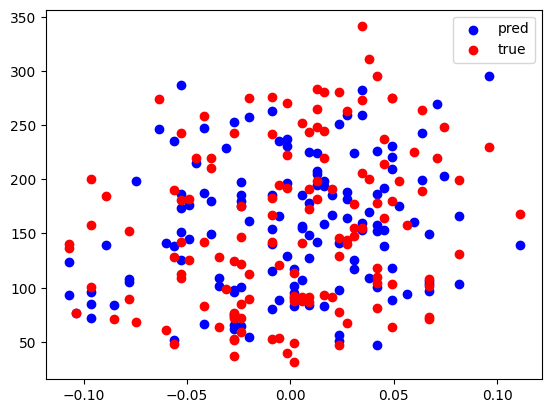

In [131]:
"""
정답 데이터와 비교 시 어느정도 데이터 예측력이 있는 것을 확인할 수 있다.
"""
y_pred = model(X_test, W, b)

plt.scatter(X_test[:, 0], y_pred, color="b", label="pred")
plt.scatter(X_test[:, 0], y_test, color="r", label="true")
plt.legend()
plt.show()

#### sklearn LinearRegression 모델과의 비교

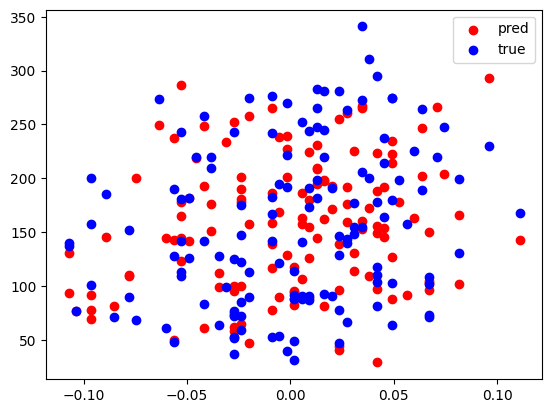

2842.7652468686397

In [132]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)

plt.scatter(X_test[:, 0], predictions, color="r", label="pred")
plt.scatter(X_test[:, 0], y_test, color="b", label="true")
plt.legend()
plt.show()

MSE(y_test, predictions)

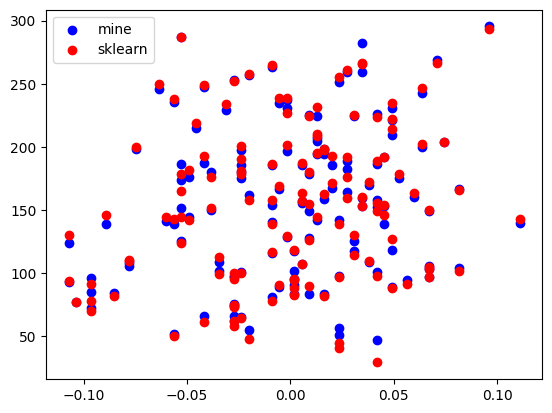

In [133]:
"""
sklearn LinearRegiression 모델과 error 수치가 비슷하게 나와,
예측 값의 분포도 유사하게 나오는 것을 확인할 수 있다.
"""
y_pred = model(X_test, W, b)

plt.scatter(X_test[:, 0], y_pred, color="b", label="mine")
plt.scatter(X_test[:, 0], predictions, color="r", label="sklearn")
plt.legend()
plt.show()

---
## Appendix

1) learning rate를 바꿔가며 loss 변화 양상 확인

- learning rate의 변화에 따라 loss의 변화 양상이 눈에 띄게 변하는 것을 확인했다.
- 적당한 크기(0.5)까지 learning rate를 올렸을 때는 학습이 빠르고 loss가 더 낮게 나왔지만,  
  그 이상으로 커지니 오히려 학습이 제대로 이뤄지지 않을 것을 확인할 수 있었다.

In [134]:
lr_list = [
    0.001,
    0.01,
    0.05,
    0.1,
    0.5,
    1.,
]
lr_losses = {lr:[] for lr in lr_list}

W_init = np.random.rand(10)
b_init = np.random.rand(1)

for lr in lr_list:
    W = W_init.copy()
    b = b_init.copy()
    LEARNING_RATE = lr
    EPOCHS = 2_000
    
    # train with specific W, b
    for epoch in range(EPOCHS):
        # measure loss
        y_pred = model(X_train, W, b)
        loss = MSE(y_train, y_pred)
        lr_losses[lr].append(loss)

        # update params
        dW, db = gradient(X_train, W, b, y_train)
        W -= LEARNING_RATE*dW
        b -= LEARNING_RATE*db

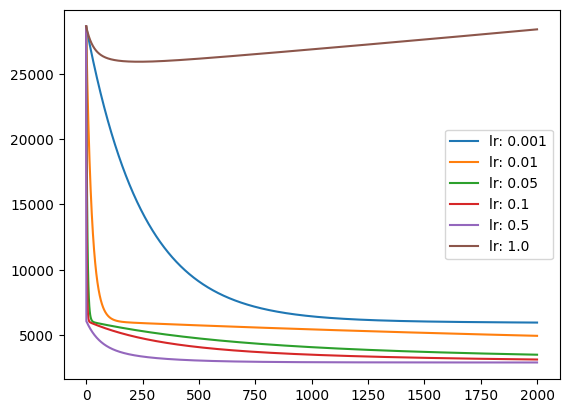

In [135]:
for lr in lr_list:
    plt.plot(lr_losses[lr], label=f"lr: {lr}")
plt.legend()
